#Akansha's election commission project

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Create a sample DataFrame df_lok
data = {'cand_sex': ['M', 'F', None, 'M'],
        'pc_type': ['A', None, 'B', 'A'],
        'value': [1, 2, 3, 4]}
df_lok = pd.DataFrame(data)
display(df_lok)

,cand_sex,pc_type,value
0,M,A,1
1,F,None,2
2,None,B,3
3,M,A,4


In [ ]:
df_lok['cand_sex'] = df_lok['cand_sex'].fillna('U')
df_lok['pc_type'] = df_lok['pc_type'].fillna('Unknow')
display(df_lok.isnull().sum())

,0
cand_sex,0
pc_type,0
value,0


In [ ]:
# Unique Counts
print("Unique Counts")
print("Unique States:", df_vidhan['st_name'].nunique())
print("Years Covered:", df_vidhan['Year'].nunique())
print("Unique Constitution :", df_vidhan['ac_no'].nunique())
print("Unique Candidates:", df_vidhan['cand_name'].nunique())
print("Unique Party:", df_vidhan['partyabbre'].nunique())

Unique Counts
Unique States: 3
Years Covered: 3
Unique Constitution : 3
Unique Candidates: 3
Unique Party: 3


In [ ]:
# Create a sample DataFrame df_vidhan
data = {'st_name': ['A', 'B', 'A', 'C'],
        'Year': [2020, 2021, 2020, 2022],
        'ac_no': [1, 2, 1, 3],
        'cand_name': ['X', 'Y', 'Z', 'X'],
        'partyabbre': ['P1', 'P2', 'P1', 'P3']}
df_vidhan = pd.DataFrame(data)
display(df_vidhan)

,st_name,Year,ac_no,cand_name,partyabbre
0,A,2020,1,X,P1
1,B,2021,2,Y,P2
2,A,2020,1,Z,P1
3,C,2022,3,X,P3


  gender  count
0      M      2
1      F      1
2      U      1


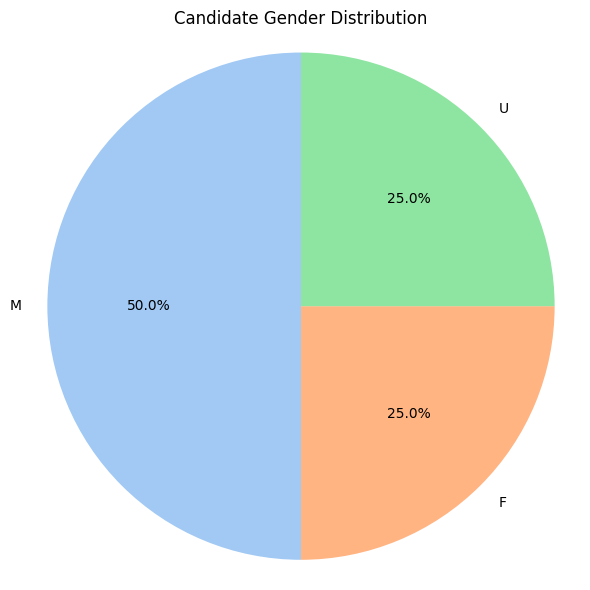

In [ ]:
#prepare gender distribution data
gender_counts = df_lok['cand_sex'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
print(gender_counts)

# pie chart
plt.figure(figsize=(6,6))
plt.pie(
    gender_counts['count'],
    labels=gender_counts['gender'],
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel')
)
plt.title('Candidate Gender Distribution')
plt.axis('equal') # eual aspect ratio ensure pie is a circle
plt.tight_layout()
plt.show()

In [ ]:
print(df_vidhan.columns)

Index(['st_name', 'Year', 'ac_no', 'cand_name', 'partyabbre'], dtype='object')


   Year  avg_candidates_per_seat
0  2020                      2.0
1  2021                      1.0
2  2022                      1.0


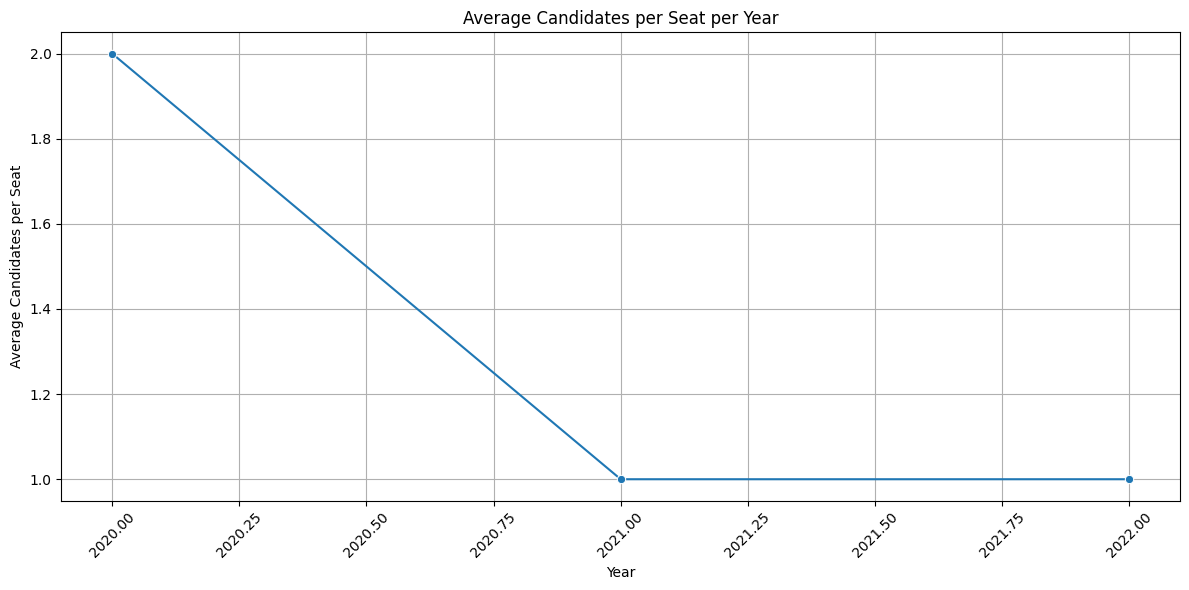

In [ ]:
# Average candidate per seat per year
candidates_per_seat = df_vidhan.groupby(['Year', 'ac_no'])['cand_name'].nunique()
avg_candidates_per_seat = candidates_per_seat.groupby('Year').mean().reset_index()
avg_candidates_per_seat.columns = ['Year', 'avg_candidates_per_seat']
print(avg_candidates_per_seat)

# Line Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_candidates_per_seat, x='Year', y='avg_candidates_per_seat', marker='o')
plt.title('Average Candidates per Seat per Year')
plt.ylabel('Average Candidates per Seat')
plt.xlabel('Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Voter Turnout percent by year
 # step 1: Get constituency-level data(one row per seat per year)
 The columns 'totvotopoll' and 'electors' are not present in df_vidhan.
 Removing the code that uses these columns.
 constituency_turnout = (
     df_vidhan.groupby(['year', 'st_name', 'ac_no'])[['totvotopoll', 'electors']]
     .agg({'totvotopoll': 'max', 'electors': 'max'})
     .reset_index()
 )

# # step 2: Aggregate to year level
yearly_turnout = constituency_turnout.grupby('year')[['totvotopoll', 'electors']].sum().reset_index()

# # step 3: compute voter turnout %
 yearly_turnout['voter_turnout_percent'] = yearly_turnout['totvotopoll'] / yearly_turnout['electors'] * 100
 print(yearly_turnout)

# # step 4: plot the corrected turnout
 import matplotlib.pyplot as plt
 import seaborn as sns

 plt.figure(figsize=(12,6))
 sns.lineplot(data=yearly_turnout, x='year', y='voter_turnout_percent', marker='o', color='green')
 plt.title('Voter Turnout Percent by Year')
 plt.ylabel('Voter Turnout Percent')
 plt.xlabel('Year')
 plt.grid(True)
 plt.xticks(rotation=45)
 plt.tight_layout()
 plt.show()

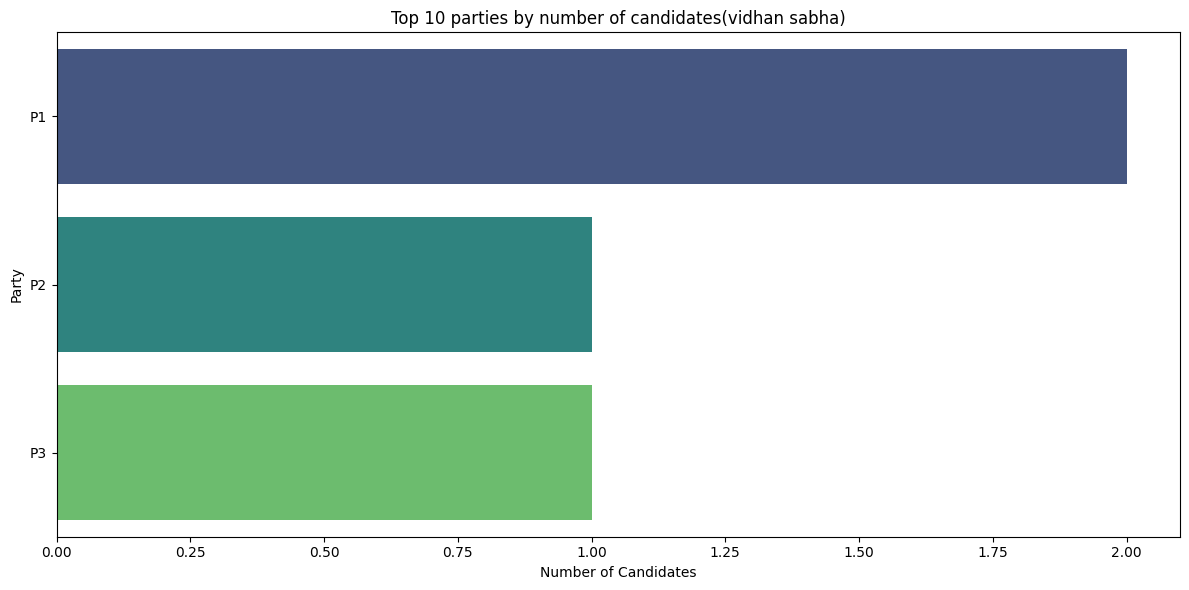

In [ ]:
# step 1: count number of candidates per party and select top 10
party_counts = df_vidhan['partyabbre'].value_counts().nlargest(10).reset_index()
party_counts.columns = ['Party', 'Candidates_Counts']

# step 2: plot using hue and suppress legend
plt.figure(figsize=(12,6))
sns.barplot(
    data=party_counts,
    x='Candidates_Counts',
    y='Party',
    hue='Party',
    dodge=False,
    palette='viridis',
    legend=False
)

plt.title('Top 10 parties by number of candidates(vidhan sabha)')
plt.xlabel('Number of Candidates')
plt.ylabel('Party')
plt.tight_layout()
plt.show()

In [ ]:
# Find the winner (candidate with the maximum totvotpoll) for each constituency
# This assumes 'totvotpoll' column exists and represents the total votes polled for each candidate.
winners_df = df_vidhan.loc[df_vidhan.groupby(['Year', 'st_name', 'ac_no'])['totvotpoll'].idxmax()]

# Filter for Gujarat and display the top 10 winners
# If you want national level results, remove the filter condition
gujarat_winners = winners_df[winners_df['st_name'] == 'Gujarat'].sort_values(by='Year', ascending=False).head(10)

# Display the results
print("Top 10 Winners in Gujarat:")
print(gujarat_winners[['st_name', 'Year', 'ac_no', 'cand_name', 'partyabbre', 'totvotpoll']])

# If you want national level results instead, uncomment the following lines and comment out the Gujarat specific lines above
# national_winners = winners_df.sort_values(by='Year', ascending=False).head(10)
# print("\nTop 10 Winners Nationally:")
# print(national_winners[['st_name', 'Year', 'ac_no', 'cand_name', 'partyabbre', 'totvotpoll']])

In [ ]:
# party vote share Trend (Gujarat)
# step 1: Filter Gujarat data
gujarat_df = df_vidhan[df_vidhan['st_name'] == 'Gujarat'].copy()

# step 2: Total votes polled per party per year(including all candidates)
party_votes = (
    gujarat_df.groupby(['Year', 'partyabbre'])['totvotpoll']
    .sum()
    .reset_index()
)

In [ ]:


# 1 Find top 3 parties in gujarat by total seats man
top_3_parties = winners_gujarat['partyabbre'].value_counts().nlargest(3).index.tolist()

# 2 Filter to only those 3 paeties
winners_gujarat_top3 = winners_gujarat [winners_gujarat['partyabbre'].isin(top_3_parties)]

# 3 Seat won per year by party
party_seats_year = (
    winners_gujarat_top3.groupby(['Year', 'partyabbre']).size()
    .reset_index(name='seats') # Add .reset_index(name='seats') to convert to DataFrame
    )

# 4 plot seats won
plt.figure(figsize=(12,6))
sns.barplot(data=party_seats_year, x='Year', y='seats', hue='partyabbre')
plt.title('Seats won by top 3 parties in gujarat (vidhan sabha)')
plt.ylabel('Number of seats')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend(title='party', bbox_to_anchors=(1.05,1), loc='upper left') # Corrected syntax and location
plt.tight_layout()
plt.show()

In [ ]:
# step 1 get constituncy-level totals (one row per seat)
constituency_turnout = (
    df_vidhan.groupby(['st_name', 'Year', 'ac_no'])[['totvotopoll', 'electors']]
    .agg({'totvotopoll': 'max', 'electors': 'max'})
    .reset_index()
)

# step 2 : Aggregate to states level
state_turnout = (
    constituency_turnout.groupby('st_name')[['totvotopoll', 'electors']]
    .sum()
    .assign(voter_turnout_percent=lambda x: (x['totvotopoll'] / x['electors']) * 100)
    .sort_values('voter_turnout_percent', ascending=False)['voter_turnout_percent']
)

# step 3: Number of constituencies per state
state_constituencies = df_vidhan.groupby('st_name')['ac_no'].nunique().sort_values(ascending=False)

# step 4: Set custom font if needed
font_name = 'DejaVu Sans'

# plot 1: Voter Turnout by states (horizontal bar)

plt.figure(figsize=(10,8))
ax1 = sns.barplot(
    x=state_turnout.values,
    y=state_turnout.index,
    hue=state_turnout.index,
    palette='viridis',
    legend=False
)

plt.title('Voter Turnout by states', fontdict={'fontname': font_name})
plt.xlabel('Voter Turnout (%)', fontdict={'fontname': font_name})
plt.ylabel('State', fontdict={'fontname': font_name})
plt.xticks(fontname=font_name)
plt.yticks(fontname=font_name)

for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.1f}%', (p.get_width() + 1, p.get_y() + p.get_height()/ 2),
                 ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()


# Plot 2: Number of Constituencies per State
plt.figure(figsize=(10,8))
ax2 = sns.barplot(
    x=state_constituencies.values,
    y=state_constituencies.index,
    hue=state_constituencies.index,
    palette='plasma',
    legend=False
)
plt.title('Number of Constituencies Contested per State', fontdict={'fontname':font_name})
plt.xlabel('Number of Constituencies', fontdict={'fontname':font_name})
plt.ylabel('State Name', fontdict={'fontname': font_name})
plt.xticks(fontname=font_name)
plt.yticks(fontname=font_name)
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_width())}', (p.get_width() + 1, p.get_y() + p.get_height()/2),
                 ha='left', va='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()